In [98]:
import numpy as np
import matplotlib.pyplot as plt
import os
import xarray as xr
import xgcm 
from fastjmd95 import jmd95numba 
import glob


#path
BASE = '/scratch/ab10313/pleiades/'

PATH_LIST_2d = glob.glob(BASE+'*_smooth/2d_data/')
PATH_LIST_3d = glob.glob(BASE+'*_smooth/3d_data/')
PATH_LIST_PP = glob.glob(BASE+'*_smooth/preprcossed_data/')

In [99]:
PATH_LIST_PP

['/scratch/ab10313/pleiades/15_bengal_smooth/preprcossed_data/',
 '/scratch/ab10313/pleiades/12_agulhas_smooth/preprcossed_data/',
 '/scratch/ab10313/pleiades/11_new_zealand_smooth/preprcossed_data/',
 '/scratch/ab10313/pleiades/10_north_pacific_smooth/preprcossed_data/',
 '/scratch/ab10313/pleiades/04_equator_atlantic_smooth/preprcossed_data/',
 '/scratch/ab10313/pleiades/01_gulf_smooth/preprcossed_data/',
 '/scratch/ab10313/pleiades/03_south_atlantic_smooth/preprcossed_data/',
 '/scratch/ab10313/pleiades/05_argentina_smooth/preprcossed_data/',
 '/scratch/ab10313/pleiades/13_australia_smooth/preprcossed_data/',
 '/scratch/ab10313/pleiades/14_indian_ocean_smooth/preprcossed_data/']

In [100]:
label_list = ['Bengal', 'New Zealand', 'North Pacific', 'Equatorial Atlantic',
              'Gulf', 'South Atlantic', 'Argentina', 'Australia', 'Indian Ocean']

In [101]:
def load_data(var_name_string,time_window=15,coarsen_factor=12):
    PATH_LIST = glob.glob(BASE+'*_smooth/preprcossed_data/'+var_name_string+'.nc')
    data_0 = xr.open_dataarray(PATH_LIST[0])
    data_app = data_0.values
    #print(PATH_LIST[0])
    #print(data_app)
    for i_file in np.arange(1,len(PATH_LIST)):
        PATH = PATH_LIST[i_file]
        data = xr.open_dataarray(PATH)
        data_app = np.concatenate((data_app,data),axis=0)
        #print(PATH_LIST[i_file])
        #print(data_app)
    return data_app

In [102]:
k_r_max_mld = load_data('k_r_max_mld')

In [103]:
k_r_max_mld

array([0.00399514, 0.07295088, 0.02468018, 0.00396205, 0.06086825,
       0.07311192, 0.06760872, 0.07063466, 0.02271331])

In [104]:
WB_kr_cross_spectra_mld = load_data('WB_kr_cross_spectra_mld')

In [105]:
WB_kr_cross_spectra_mld_rs = np.reshape(WB_kr_cross_spectra_mld,(len(PATH_LIST_PP),120))

In [106]:
WB_kr_cross_spectra_mld.shape

(1200,)

In [50]:
WB_kr_cross_spectra_mld_rs.shape

(10, 120)

In [51]:
ds_T = xr.open_dataset(PATH_LIST_3d[5]+'ds_T.nc',engine="h5netcdf")
HML = xr.open_dataarray(PATH_LIST_PP[5]+'HML.nc',engine="h5netcdf")

dx = ds_T.dxF.mean()
WB_cross_spectra = xr.open_dataarray(PATH_LIST_PP[5]+'WB_cross_spectra_z.nc')
k_r = WB_cross_spectra.freq_r/dx/1e-3

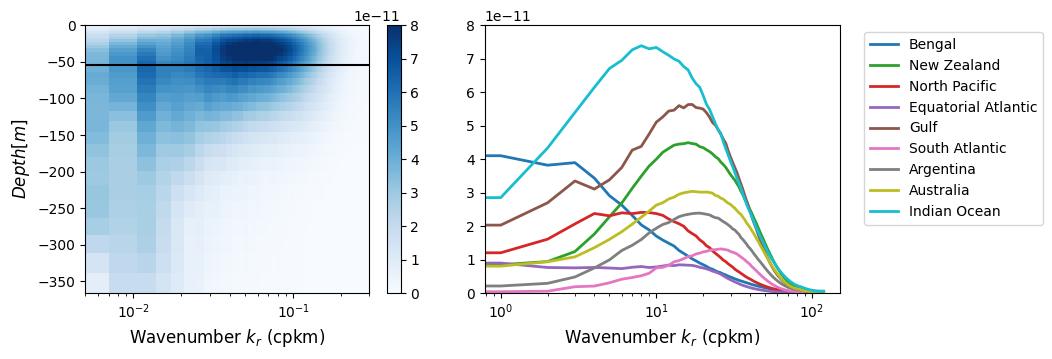

In [119]:
PATH_LIST = glob.glob(BASE+'*/preprcossed_data/WB_kr_cross_spectra_mld.nc') 
label_list = ['Bengal','', 'New Zealand', 'North Pacific', 'Equatorial Atlantic',
              'Gulf', 'South Atlantic', 'Argentina', 'Australia', 'Indian Ocean']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
#fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
fig.tight_layout(pad=0.1)

plt.subplot(122)
for i_file in np.arange(0,len(PATH_LIST_PP)): 
    plt.plot(WB_kr_cross_spectra_mld_rs[i_file,:],linewidth=2,label=label_list[i_file]);
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.xscale("log")
    plt.ylim([0,8e-11])
    plt.xlabel(r'Wavenumber $k_r$ (cpkm)',fontsize=12)
    #plt.title('Variance-preserving $\overline{wb}^z$ cross-spectrum')
    #plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    
    
plt.subplot(121)
plt.pcolor(k_r, ds_T.Z[:35], WB_cross_spectra.real[:35,:]*k_r, cmap='Blues',vmin=0, vmax=8e-11)
plt.axhline(HML.mean().values,color = 'k', linestyle = '-')
plt.xscale("log")
plt.xlabel(r'Wavenumber $k_r$ (cpkm)',fontsize=12)
plt.ylabel(r'$Depth [m]$',fontsize=12)
plt.xlim([5e-3,3e-1])
plt.colorbar()
#plt.title('Variance-preserving '+ r'$wb$' +' cross-spectrum', fontsize=10)

#plt.subplots_adjust(bottom=0.025)
plt.savefig('./figures/wb_cospectrum', bbox_inches='tight')